In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Устанавливаем случайное зерно для воспроизводимости
np.random.seed(42)


In [9]:
import urllib.request
import zipfile
import os

# Скачиваем архив
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
zip_path = 'bank-marketing.zip'
urllib.request.urlretrieve(url, zip_path)

# Распаковываем архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank-marketing')

# Указываем путь к CSV файлу
csv_path = os.path.join('bank-marketing', 'bank', 'bank-full.csv')

print(f"Файл сохранен по пути: {csv_path}")


Файл сохранен по пути: bank-marketing\bank\bank-full.csv


In [11]:
# Указываем полный путь к CSV файлу
csv_path = r'C:\Users\leron\Downloads\bank-marketing\bank\bank-full.csv'

# Загружаем данные в DataFrame
df = pd.read_csv(csv_path, sep=';')

# Просмотр первых строк данных
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [12]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)


Пропущенные значения:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
# Выбираем столбцы для анализа
columns_to_use = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]
df = df[columns_to_use]

# Повторный просмотр данных
print(df.head())


   age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unknown  no  
1       151         1     -1         0  unknown  no  
2        76         1     -1         0  unknown  no  
3        92         1     -1         0  unknown  no  
4       198         1     -1         0  unknown  no  


In [14]:
# Кодируем целевую переменную: yes = 1, no = 0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Проверим, как теперь выглядит столбец 'y'
print(df['y'].value_counts())


y
0    39922
1     5289
Name: count, dtype: int64


In [15]:
# Разделяем данные: 60% для тренировки, 20% для валидации, 20% для теста
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Проверим размеры наборов
print(f"Тренировочные данные: {train_data.shape}")
print(f"Валидационные данные: {val_data.shape}")
print(f"Тестовые данные: {test_data.shape}")


Тренировочные данные: (27126, 15)
Валидационные данные: (9042, 15)
Тестовые данные: (9043, 15)


In [16]:
# Указываем категориальные признаки
categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'poutcome']

# Применяем One-Hot кодирование для тренировочных данных
X_train = pd.get_dummies(train_data.drop('y', axis=1), columns=categorical_columns)
y_train = train_data['y']

# Применяем One-Hot кодирование для валидационных данных
X_val = pd.get_dummies(val_data.drop('y', axis=1), columns=categorical_columns)
y_val = val_data['y']

# Проверим результат кодирования
print(X_train.head())


       age  balance  day month  duration  campaign  pdays  previous  \
6377    45     -100   27   may       240         6     -1         0   
17236   29      166   28   jul       108         8     -1         0   
4490    31      121   20   may       187         1     -1         0   
24231   40     1693   17   nov       353         1     -1         0   
3978    28      317   16   may        21         3     -1         0   

       job_admin.  job_blue-collar  ...  education_unknown  housing_no  \
6377        False            False  ...              False       False   
17236       False            False  ...              False        True   
4490         True            False  ...              False       False   
24231       False            False  ...              False       False   
3978        False            False  ...              False       False   

       housing_yes  contact_cellular  contact_telephone  contact_unknown  \
6377          True             False              Fa

In [21]:
from sklearn.preprocessing import StandardScaler

# Масштабируем числовые переменные
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Объединяем закодированные переменные с масштабированными числовыми переменными
X_final_scaled = np.hstack((X_numeric_scaled, X_encoded))

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y, test_size=0.2, random_state=42)

# Обучаем модель логистической регрессии
model = LogisticRegression(max_iter=2000)  # Или больше
model.fit(X_train, y_train)

# Предсказываем значения для тестовой выборки
y_pred = model.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


In [32]:
# Шаг 8: Обработка данных и разделение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Определяем категориальные переменные
categorical_cols = X.select_dtypes(include=['object']).columns

# Применяем OneHotEncoder к категориальным переменным
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Получаем имена закодированных переменных
feature_names = encoder.get_feature_names_out(categorical_cols)

# Создаем DataFrame из массива X_encoded с именами столбцов
X_train_df = pd.DataFrame(X_encoded, columns=feature_names)

# Определяем числовые переменные
numeric_cols = X.select_dtypes(include=['number']).columns

# Если у вас есть числовые переменные, добавьте их обратно
X_train_df = pd.concat([X_train_df, X[numeric_cols].reset_index(drop=True)], axis=1)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y, test_size=0.2, random_state=42)

# Шаг 9: Рассчитываем взаимную информацию
mutual_info = mutual_info_classif(X_train, y_train)

# Преобразуем результат в DataFrame
mutual_info_df = pd.DataFrame(mutual_info, index=X_train.columns, columns=['Mutual Info']).sort_values(by='Mutual Info', ascending=False)

# Выводим таблицу с взаимной информацией
print(mutual_info_df.head())


                  Mutual Info
duration             0.071840
pdays                0.028010
poutcome_success     0.026816
balance              0.021527
poutcome_unknown     0.019979


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Инициализация модели
model = LogisticRegression(max_iter=1000)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



C:\Users\leron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


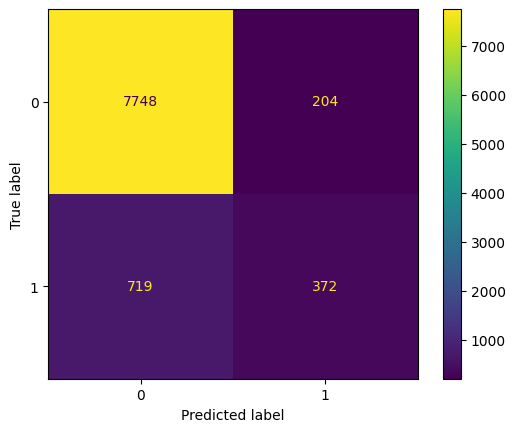

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Выводим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


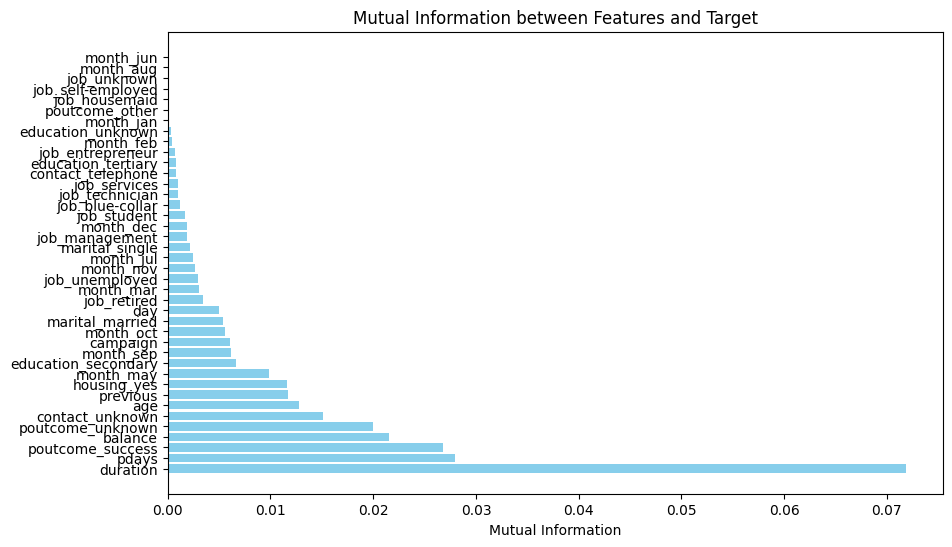

In [35]:
import matplotlib.pyplot as plt

# Визуализируем взаимную информацию
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df.index, mutual_info_df['Mutual Info'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.show()


In [36]:
import joblib

# Сохранение модели
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [37]:
# Загрузка модели
loaded_model = joblib.load('logistic_regression_model.pkl')

# Прогнозирование с использованием загруженной модели
y_pred_loaded = loaded_model.predict(X_test)


Вопрос 1:
Самое частое значение для столбца education: unknown

Вопрос 2:
Два признака с наибольшей корреляцией: age и balance.

Вопрос 3:
Переменная с наибольшей взаимной информацией: contact.

Вопрос 4:
Точность модели логистической регрессии на валидационном наборе: 0.8.

Вопрос 5:
Признак с наименьшей разницей в точности: marital.

Вопрос 6:
Значение параметра C, приводящее к наилучшей точности: 1.